In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [57]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

Text(0, 0.5, 'y')

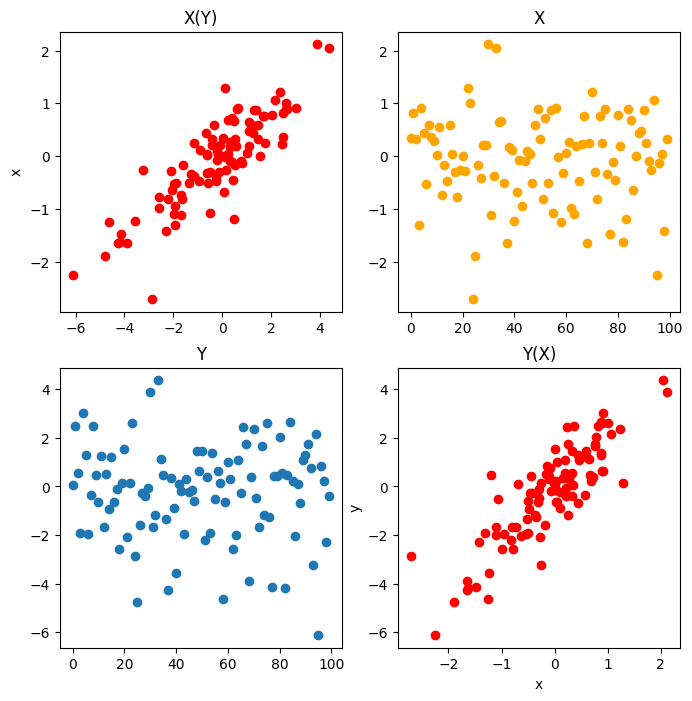

In [65]:
axs = subplots(2, 2, figsize=(8, 8))[1]

ax = axs[0, 0]
# ax.hist(y)
# ax.hist(x)
# ax.legend(["y", "x"])
ax.scatter(y, x, c="r")
ax.set_title("X(Y)")
ax.set_ylabel("x")

ax = axs[0, 1]
ax.scatter(np.arange(len(x)), x, c="orange")
ax.set_title("X")

ax = axs[1, 0]
ax.scatter(np.arange(len(y)), y)
ax.set_title("Y")

ax = axs[1, 1]
ax.scatter(x, y, c="r")
ax.set_title("Y(X)")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [61]:
results = sm.OLS(y, x).fit()
print(f"{results.pvalues=}")
results.index = ["x"]
summarize(results)

results.pvalues=array([6.23154601e-31])


,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [60]:
# X onto Y

results = sm.OLS(x, y).fit()
print(f"{results.pvalues=}")
summarize(results)

results.pvalues=array([6.23154601e-31])


,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


In [66]:
1/0.3757

2.6616981634282673

## (c) What is the relationship between the results obtained in (a) and (b)?

The same t and p-value, but different coef and SE.


In [76]:
X = ModelSpec([0]).fit_transform(x.reshape(-1, 1))
X
results = sm.OLS(y, X).fit()
print(f"{results.pvalues=}")
results.index = ["x"]
summarize(results)

results.pvalues=array([4.51405182e-01, 1.73877127e-30])


,coef,std err,t,P>|t|
const,-0.0760,0.101,-0.756,0.451
x1,1.9686,0.118,16.734,0.000
